In [ ]:
pip install pandas numpy yfinance matplotlib

🔬 LABORATORIO DE ANÁLISIS DE INDICADORES TÉCNICOS
Este programa va a responder científicamente:
¿El RSI realmente predice retornos futuros?

📊 Analizando poder predictivo de RSI para SPY...
📅 Período: 2015-01-01 hasta hoy
🔍 RSI período: 14 días
📈 Retornos futuros: 5 días
--------------------------------------------------
⬇️  Descargando datos históricos...
YF.download() has changed argument auto_adjust default to True
🧮 Calculando RSI...
📊 Calculando retornos futuros de 5 días...
📉 Datos disponibles para análisis: 2601 observaciones
📊 Dividiendo RSI en 10 grupos...
🔍 Analizando retornos por grupo de RSI...

📋 RESULTADOS POR GRUPO DE RSI:
           RSI_Min  RSI_Max  count   mean    std
RSI_Group                                       
0             3.99    35.09    261  0.684  3.809
1            35.12    41.83    260  0.282  2.643
2            41.83    48.26    260  0.286  2.611
3            48.32    53.85    260  0.117  2.458
4            53.87    58.09    260  0.252  2.283
5          

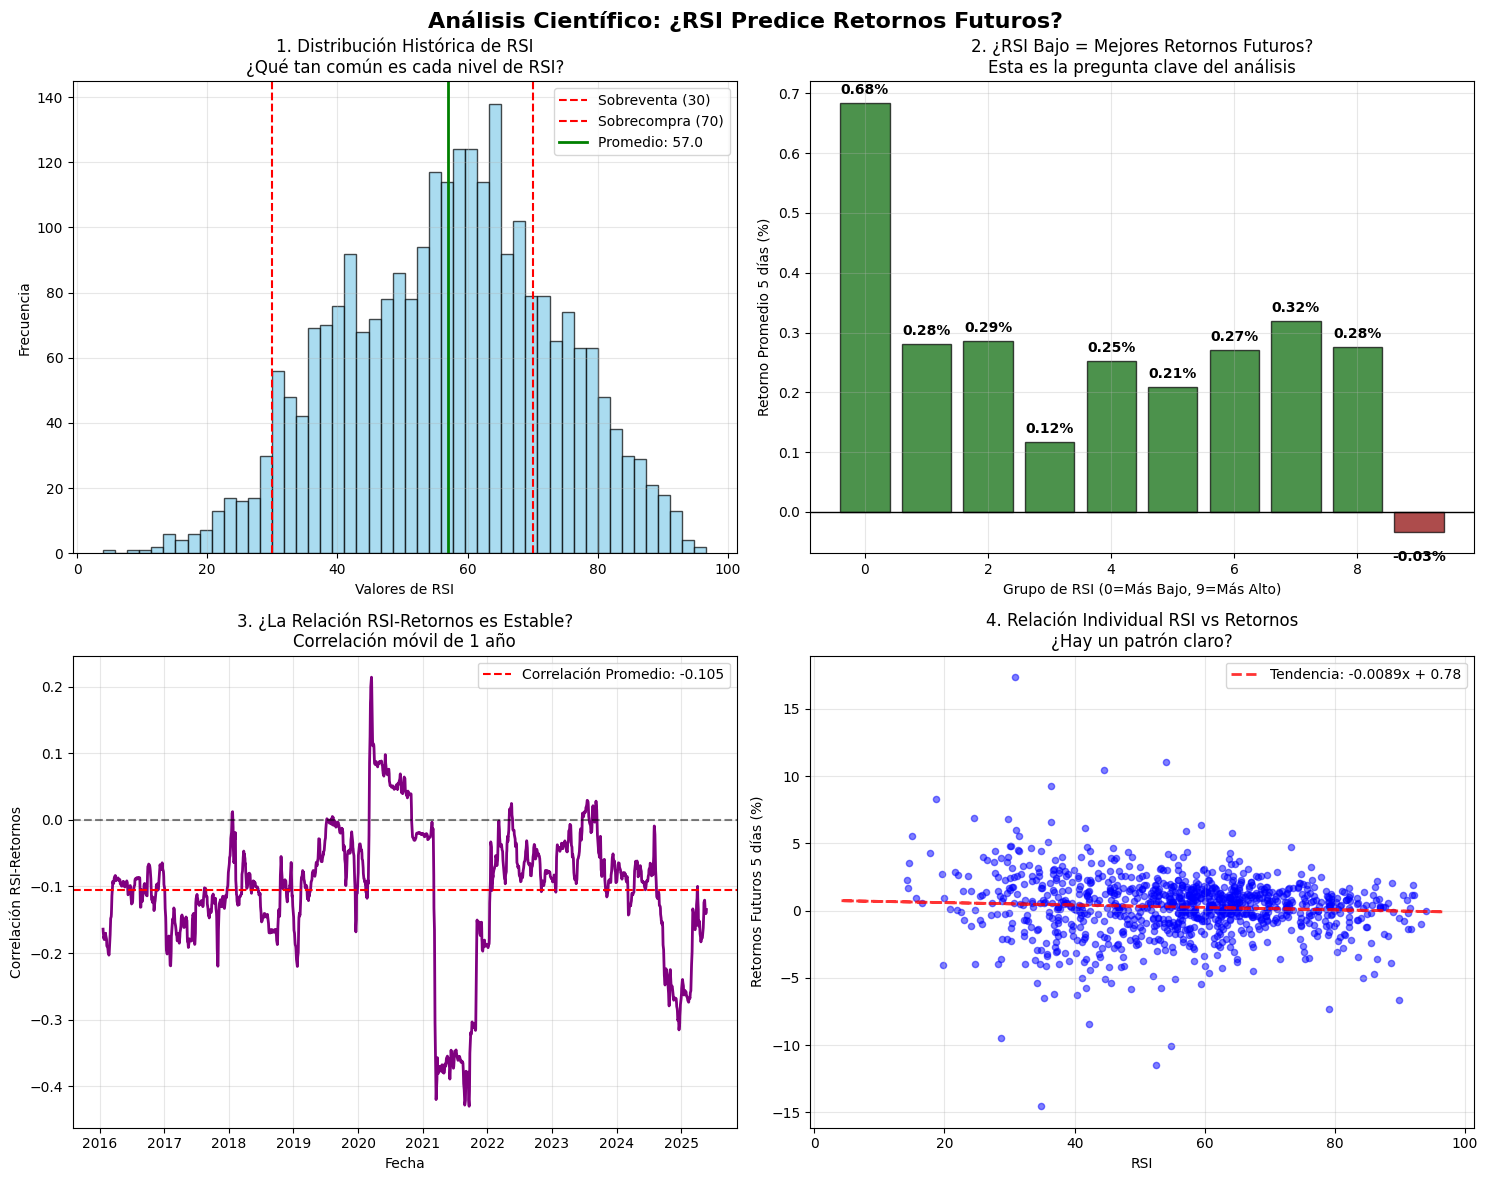


🎓 INTERPRETACIÓN EDUCATIVA DE RESULTADOS

📊 HALLAZGOS PRINCIPALES:
   • RSI más bajo (grupo 0): 0.68% retorno promedio
   • RSI más alto (grupo 9): -0.03% retorno promedio
   • Diferencia: 0.72% puntos porcentuales

🤔 ¿QUÉ SIGNIFICA ESTO EN LA PRÁCTICA?
   ✅ RSI muestra poder predictivo moderado
   📈 Comprar en RSI bajo podría generar 0.72% extra por operación
   ⚠️  Pero recuerda: esto es promedio histórico, no garantía futura

📈 ANÁLISIS DE CORRELACIÓN:
   • Correlación RSI-Retornos: -0.0622
   🔍 Correlación débil pero presente

💡 RECOMENDACIONES PRÁCTICAS:
   1. 🧪 Este análisis es exploratorio, no una estrategia de inversión
   2. 📊 Considera costos de transacción en cualquier estrategia
   3. ⏰ Los patrones históricos pueden cambiar con el tiempo
   4. 🔄 Repite este análisis con otros indicadores y períodos
   5. 📚 Combina análisis técnico con fundamental para mejores decisiones

🎯 CONCLUSIÓN:
Has completado un análisis científico de RSI usando 2601 observaciones.
Ahora tienes evi

In [ ]:
"""
VALIDADOR CIENTÍFICO DE INDICADORES TÉCNICOS
===========================================

Este programa responde a una pregunta fundamental: ¿Los indicadores técnicos
realmente predicen retornos futuros de manera estadísticamente significativa?

Autor: Código Educativo para la Comunidad
Licencia: Uso libre para fines educativos
"""

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


def calculate_rsi_manually(prices, period=14):
    """
    Calcula RSI manualmente para fines educativos.

    El RSI mide la velocidad y magnitud de los cambios de precio.
    Matemáticamente: RSI = 100 - (100 / (1 + RS))
    donde RS = Promedio de Ganancias / Promedio de Pérdidas

    ¿Por qué es importante entender esto? Porque muchos traders usan RSI
    sin comprender realmente qué mide o si funciona.
    """

    # Paso 1: Calcular cambios diarios de precio
    price_changes = prices.diff()

    # Paso 2: Separar ganancias y pérdidas
    gains = price_changes.where(price_changes > 0, 0)  # Solo valores positivos
    losses = -price_changes.where(price_changes < 0, 0)  # Solo valores negativos (convertidos a positivos)

    # Paso 3: Calcular promedios móviles simples
    # Nota: RSI "oficial" usa promedios móviles exponenciales, pero SMA es más fácil de entender
    avg_gains = gains.rolling(window=period).mean()
    avg_losses = losses.rolling(window=period).mean()

    # Paso 4: Calcular Relative Strength (RS)
    rs = avg_gains / avg_losses

    # Paso 5: Calcular RSI final
    rsi = 100 - (100 / (1 + rs))

    return rsi


def analyze_indicator_predictive_power(ticker='SPY', start_date='2010-01-01',
                                     rsi_period=14, future_days=5, quantiles=10):
    """
    Función principal que analiza si RSI realmente predice retornos futuros.

    Esta es la pregunta clave: Si RSI funciona como dicen los libros de trading,
    entonces los stocks con RSI bajo deberían tener mejores retornos futuros
    que los stocks con RSI alto. ¿Es esto cierto?
    """

    print(f"📊 Analizando poder predictivo de RSI para {ticker}...")
    print(f"📅 Período: {start_date} hasta hoy")
    print(f"🔍 RSI período: {rsi_period} días")
    print(f"📈 Retornos futuros: {future_days} días")
    print("-" * 50)

    # Paso 1: Descargar datos históricos
    print("⬇️  Descargando datos históricos...")
    data = yf.download(ticker, start=start_date, progress=False)

    if data.empty:
        print("❌ Error: No se pudieron descargar los datos")
        return None

    # Paso 2: Calcular RSI
    print("🧮 Calculando RSI...")
    data['RSI'] = calculate_rsi_manually(data['Close'], period=rsi_period)

    # Paso 3: Calcular retornos futuros
    print(f"📊 Calculando retornos futuros de {future_days} días...")
    data[f'Future_Return_{future_days}d'] = (data['Close'].shift(-future_days) / data['Close'] - 1) * 100

    # Paso 4: Eliminar datos faltantes
    clean_data = data.dropna()
    print(f"📉 Datos disponibles para análisis: {len(clean_data)} observaciones")

    if len(clean_data) < 100:
        print("⚠️  Advertencia: Pocos datos disponibles. Los resultados pueden no ser confiables.")

    # Paso 5: Dividir RSI en grupos (cuantiles)
    print(f"📊 Dividiendo RSI en {quantiles} grupos...")
    clean_data['RSI_Group'] = pd.qcut(clean_data['RSI'], q=quantiles, labels=False, duplicates='drop')

    # Paso 6: Analizar retornos por grupo
    print("🔍 Analizando retornos por grupo de RSI...")
    group_analysis = clean_data.groupby('RSI_Group')[f'Future_Return_{future_days}d'].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(4)

    # Agregar información sobre los rangos de RSI
    rsi_ranges = clean_data.groupby('RSI_Group')['RSI'].agg(['min', 'max']).round(2)
    group_analysis['RSI_Min'] = rsi_ranges['min']
    group_analysis['RSI_Max'] = rsi_ranges['max']

    return clean_data, group_analysis


def create_educational_plots(data, group_analysis, future_days=5):
    """
    Crea visualizaciones educativas que cuentan la historia completa.

    Estos gráficos están diseñados para responder preguntas específicas:
    1. ¿Cómo se distribuye RSI históricamente?
    2. ¿Los grupos de RSI bajo realmente tienen mejores retornos?
    3. ¿Esta relación es estable en el tiempo?
    4. ¿Qué tan fuerte es la relación RSI-retornos?
    """

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Análisis Científico: ¿RSI Predice Retornos Futuros?', fontsize=16, fontweight='bold')

    # Gráfico 1: Distribución histórica de RSI
    ax1.hist(data['RSI'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.axvline(30, color='red', linestyle='--', label='Sobreventa (30)')
    ax1.axvline(70, color='red', linestyle='--', label='Sobrecompra (70)')
    ax1.axvline(data['RSI'].mean(), color='green', linestyle='-', linewidth=2,
                label=f'Promedio: {data["RSI"].mean():.1f}')
    ax1.set_xlabel('Valores de RSI')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('1. Distribución Histórica de RSI\n¿Qué tan común es cada nivel de RSI?')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Retornos promedio por grupo de RSI
    group_means = group_analysis['mean']
    colors = ['darkred' if x < 0 else 'darkgreen' for x in group_means]

    bars = ax2.bar(range(len(group_means)), group_means, color=colors, alpha=0.7, edgecolor='black')
    ax2.axhline(0, color='black', linestyle='-', linewidth=1)
    ax2.set_xlabel('Grupo de RSI (0=Más Bajo, 9=Más Alto)')
    ax2.set_ylabel(f'Retorno Promedio {future_days} días (%)')
    ax2.set_title('2. ¿RSI Bajo = Mejores Retornos Futuros?\nEsta es la pregunta clave del análisis')
    ax2.grid(True, alpha=0.3)

    # Agregar valores sobre las barras
    for i, (bar, value) in enumerate(zip(bars, group_means)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01 if value > 0 else bar.get_height() - 0.03,
                f'{value:.2f}%', ha='center', va='bottom' if value > 0 else 'top', fontweight='bold')

    # Gráfico 3: Evolución temporal de la correlación
    # Calculamos correlación móvil de 252 días (1 año)
    rolling_corr = data['RSI'].rolling(252).corr(data[f'Future_Return_{future_days}d'])

    ax3.plot(data.index, rolling_corr, color='purple', linewidth=2)
    ax3.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax3.axhline(rolling_corr.mean(), color='red', linestyle='--',
                label=f'Correlación Promedio: {rolling_corr.mean():.3f}')
    ax3.set_xlabel('Fecha')
    ax3.set_ylabel('Correlación RSI-Retornos')
    ax3.set_title('3. ¿La Relación RSI-Retornos es Estable?\nCorrelación móvil de 1 año')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Gráfico 4: Scatter plot con línea de tendencia
    sample_data = data.sample(min(1000, len(data)))  # Muestra para no saturar el gráfico

    ax4.scatter(sample_data['RSI'], sample_data[f'Future_Return_{future_days}d'],
                alpha=0.5, color='blue', s=20)

    # Línea de tendencia
    z = np.polyfit(data['RSI'].dropna(), data[f'Future_Return_{future_days}d'].dropna(), 1)
    p = np.poly1d(z)
    ax4.plot(data['RSI'], p(data['RSI']), "r--", alpha=0.8, linewidth=2,
             label=f'Tendencia: {z[0]:.4f}x + {z[1]:.2f}')

    ax4.set_xlabel('RSI')
    ax4.set_ylabel(f'Retornos Futuros {future_days} días (%)')
    ax4.set_title('4. Relación Individual RSI vs Retornos\n¿Hay un patrón claro?')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def interpret_results(group_analysis, data, future_days):
    """
    Interpreta los resultados de manera educativa y práctica.

    Esta función actúa como tu profesor de finanzas explicando
    qué significan realmente los números.
    """

    print("\n" + "="*60)
    print("🎓 INTERPRETACIÓN EDUCATIVA DE RESULTADOS")
    print("="*60)

    # Análisis básico de efectividad
    lowest_rsi_return = group_analysis.iloc[0]['mean']
    highest_rsi_return = group_analysis.iloc[-1]['mean']
    difference = lowest_rsi_return - highest_rsi_return

    print(f"\n📊 HALLAZGOS PRINCIPALES:")
    print(f"   • RSI más bajo (grupo 0): {lowest_rsi_return:.2f}% retorno promedio")
    print(f"   • RSI más alto (grupo 9): {highest_rsi_return:.2f}% retorno promedio")
    print(f"   • Diferencia: {difference:.2f}% puntos porcentuales")

    # Interpretación práctica
    print(f"\n🤔 ¿QUÉ SIGNIFICA ESTO EN LA PRÁCTICA?")

    if difference > 0.5:
        print(f"   ✅ RSI muestra poder predictivo moderado")
        print(f"   📈 Comprar en RSI bajo podría generar {difference:.2f}% extra por operación")
        print(f"   ⚠️  Pero recuerda: esto es promedio histórico, no garantía futura")
    elif difference > 0.1:
        print(f"   🤏 RSI muestra poder predictivo débil")
        print(f"   📊 La diferencia de {difference:.2f}% es pequeña")
        print(f"   💰 Los costos de transacción podrían eliminar esta ventaja")
    else:
        print(f"   ❌ RSI no muestra poder predictivo significativo")
        print(f"   🎲 La diferencia de {difference:.2f}% es prácticamente ruido")
        print(f"   🚫 No es una base confiable para decisiones de inversión")

    # Análisis de correlación
    correlation = data['RSI'].corr(data[f'Future_Return_{future_days}d'])
    print(f"\n📈 ANÁLISIS DE CORRELACIÓN:")
    print(f"   • Correlación RSI-Retornos: {correlation:.4f}")

    if abs(correlation) > 0.1:
        print(f"   📊 Correlación moderadamente detectable")
    elif abs(correlation) > 0.05:
        print(f"   🔍 Correlación débil pero presente")
    else:
        print(f"   🚫 Correlación prácticamente inexistente")

    # Consejos prácticos
    print(f"\n💡 RECOMENDACIONES PRÁCTICAS:")
    print(f"   1. 🧪 Este análisis es exploratorio, no una estrategia de inversión")
    print(f"   2. 📊 Considera costos de transacción en cualquier estrategia")
    print(f"   3. ⏰ Los patrones históricos pueden cambiar con el tiempo")
    print(f"   4. 🔄 Repite este análisis con otros indicadores y períodos")
    print(f"   5. 📚 Combina análisis técnico con fundamental para mejores decisiones")


def main():
    """
    Función principal que ejecuta el análisis completo.

    Esta es tu laboratorio de investigación para probar
    si los indicadores técnicos realmente funcionan.
    """

    print("🔬 LABORATORIO DE ANÁLISIS DE INDICADORES TÉCNICOS")
    print("=" * 55)
    print("Este programa va a responder científicamente:")
    print("¿El RSI realmente predice retornos futuros?")
    print("")

    # Ejecutar análisis principal
    try:
        data, group_analysis = analyze_indicator_predictive_power(
            ticker='SPY',           # S&P 500 ETF - buen proxy del mercado
            start_date='2015-01-01', # 10 años de datos
            rsi_period=14,          # RSI estándar de 14 días
            future_days=5,          # Retornos a 5 días (1 semana de trading)
            quantiles=10            # 10 grupos para análisis detallado
        )

        if data is not None:
            print("\n📋 RESULTADOS POR GRUPO DE RSI:")
            print(group_analysis[['RSI_Min', 'RSI_Max', 'count', 'mean', 'std']].round(3))

            # Crear visualizaciones educativas
            create_educational_plots(data, group_analysis, future_days=5)

            # Interpretar resultados
            interpret_results(group_analysis, data, future_days=5)

            print(f"\n🎯 CONCLUSIÓN:")
            print(f"Has completado un análisis científico de RSI usando {len(data)} observaciones.")
            print(f"Ahora tienes evidencia empírica sobre si este indicador realmente funciona.")

        else:
            print("❌ No se pudo completar el análisis. Verifica tu conexión a internet.")

    except Exception as e:
        print(f"❌ Error durante el análisis: {e}")
        print("💡 Sugerencia: Verifica que tengas instalado: pip install yfinance pandas matplotlib numpy")


if __name__ == "__main__":
    main()